# 🔗 Workflow Integration - Complete SAR Processing System

Welcome to Phase 4 of the Financial Services Agentic AI Project!

In this notebook, you'll integrate both AI agents into a complete **end-to-end SAR processing workflow** that demonstrates real-world financial compliance automation.

## 🎯 Learning Objectives
- Build a complete two-stage AI workflow with human oversight
- Implement human-in-the-loop decision gates for compliance
- Generate complete SAR documents from AI analysis
- Create comprehensive audit trails for regulatory examination
- Demonstrate cost optimization through intelligent agent coordination

## 📋 Business Context
This workflow simulates how banks actually process suspicious activity reports:
1. **Risk Screening**: AI agents analyze transaction patterns for suspicious activity
2. **Human Review**: Compliance officers review AI findings before proceeding
3. **Narrative Generation**: Only approved cases get full compliance documentation
4. **SAR Filing**: Complete regulatory forms are generated for submission
5. **Audit Documentation**: Every decision is logged for regulatory examination

## 🏗️ System Architecture

```
📊 CSV Data → 🔍 Risk Analyst → 👤 Human Decision → ✅ Compliance Officer → 📄 SAR Document
              (Chain-of-Thought)    (Gate)         (ReACT Framework)     (FinCEN Ready)
```

## 🚀 Prerequisites Check

Before starting, ensure you have completed:
- ✅ Phase 1: Foundation components (`foundation_sar.py`)
- ✅ Phase 2: Risk Analyst Agent (`risk_analyst_agent.py`)
- ✅ Phase 3: Compliance Officer Agent (`compliance_officer_agent.py`)
- ✅ Both agents pass their comprehensive test scenarios

If any component is missing, return to previous notebooks to complete implementation.

In [1]:
# Setup and Environment Configuration
import os
import sys
import json
import pandas as pd
import uuid
import hashlib
from datetime import datetime, timedelta
from dotenv import load_dotenv

# Add src directory to Python path for module imports
#sys.path.append(os.path.abspath('../src'))
sys.path.insert(0, os.path.abspath('..'))

# Load environment variables
load_dotenv('../.env')

print("📚 Libraries imported successfully!")
print("🔐 Environment variables loaded")
print("📂 Source directory added to Python path")

📚 Libraries imported successfully!
🔐 Environment variables loaded
📂 Source directory added to Python path


In [2]:
# OpenAI Setup for Vocareum
import openai

# Initialize OpenAI client for Vocareum
openai_api_key = os.getenv('UDACITY_OPENAI_API_KEY')

if not openai_api_key:
    print("⚠️ WARNING: No OpenAI API key found!")
    print("Please set OPENAI_API_KEY in your .env file")
    print("Get your Vocareum OpenAI API key from 'Cloud Resources' in your workspace")
else:
    # Vocareum requires routing through their servers
    client = openai.OpenAI(
        base_url="https://openai.vocareum.com/v1",
        api_key=openai_api_key
    )
    print("✅ OpenAI client initialized with Vocareum routing")
    print(f"🔑 API key: {openai_api_key[:8]}...{openai_api_key[-4:]}")
    print("📍 Base URL: https://openai.vocareum.com/v1")

✅ OpenAI client initialized with Vocareum routing
🔑 API key: voc-1308...7971
📍 Base URL: https://openai.vocareum.com/v1


In [3]:
# Quick test call to verify setup
response = client.chat.completions.create(
                    model="gpt-3.5-turbo",  #"gpt-4", "gpt-3.5-turbo"
                    messages=[
                        {"role": "system", "content": "You are an financial risk analyst."},
                        {"role": "user", "content": "provide guidence on analyzing financial transactions."}
                    ],
                    temperature=0.2,  # Lower temperature for consistency in financial analysis
                    max_tokens=4096,   # Sufficient for detailed CoT reasoning
                    #response_format={"type": "json_object"}  # Enforce JSON response
                )
                
                # Extract response content
print("llm raw response: ", response)
print("llm response: ",  response.choices[0].message.content)

llm raw response:  ChatCompletion(id='chatcmpl-DC5i7S9NawgBGoHxRgLQBUn0lCvtM', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content="Analyzing financial transactions is a crucial aspect of financial risk analysis. Here are some guidelines to help you effectively analyze financial transactions:\n\n1. Understand the nature of the transaction: Before analyzing a financial transaction, it is important to understand the nature of the transaction, including the parties involved, the purpose of the transaction, and the terms and conditions.\n\n2. Review supporting documentation: Gather and review all relevant supporting documentation related to the transaction, such as contracts, invoices, receipts, and financial statements. This will help you gain a comprehensive understanding of the transaction.\n\n3. Verify the accuracy of the transaction: Ensure that the financial transaction has been accurately recorded and that all relevant information has 

In [4]:
# TODO: Import Your Implemented Components
# Students: Import your foundation components and agents

# print("📋 TODO: Import your implemented components")
# print("Uncomment and modify these imports once you've implemented all components:")

from src.foundation_sar import (
    CustomerData,
    AccountData,
    TransactionData,
    CaseData,
    RiskAnalystOutput,
    ComplianceOfficerOutput,
    ExplainabilityLogger,
    DataLoader,
    load_csv_data
)
from src.risk_analyst_agent import RiskAnalystAgent
from src.compliance_officer_agent import ComplianceOfficerAgent

# TODO: Create agent instances
explainability_logger = ExplainabilityLogger("../outputs/audit_logs/workflow_integration.jsonl")
risk_agent = RiskAnalystAgent(client, explainability_logger)
compliance_agent = ComplianceOfficerAgent(client, explainability_logger)

print("✅ Ready to import components after implementation")

✅ Ready to import components after implementation


## 📊 Step 1: Data Loading and Preprocessing

Load the financial data and prepare it for analysis.

In [5]:
# TODO: Load and Preprocess Financial Data
# Students: Load customer, account, and transaction data

def load_and_preprocess_data():
    """
    TODO: Load CSV data and prepare for analysis
    
    This function should:
    1. Load customers.csv, accounts.csv, transactions.csv
    2. Handle missing values appropriately
    3. Create data dictionaries for processing
    4. Return cleaned datasets
    """
    print("📊 Loading Financial Data")
    # print("📋 TODO: Load CSV files from ../data/ directory")
    # print("📋 TODO: Handle NaN values in optional fields")
    # print("📋 TODO: Convert to dictionaries for processing")
    
    # Example structure (uncomment and modify):
    customers_df = pd.read_csv("../data/customers.csv", dtype={'ssn_last_4': str})
    accounts_df = pd.read_csv("../data/accounts.csv")
    transactions_df = pd.read_csv("../data/transactions.csv")
    
    # Handle NaN values
    transactions_df['counterparty'] = transactions_df['counterparty'].fillna('')
    transactions_df['location'] = transactions_df['location'].fillna('')
    customers_df['phone'] = customers_df['phone'].fillna('')
    
    # Convert to dictionaries
    customers_data = customers_df.to_dict('records')
    accounts_data = accounts_df.to_dict('records')
    transactions_data = transactions_df.to_dict('records')
    
    print(f"📈 Loaded: {len(customers_data)} customers, {len(accounts_data)} accounts, {len(transactions_data)} transactions")
    return customers_data, accounts_data, transactions_data
    
    #return None, None, None

# Load data
customers_data, accounts_data, transactions_data = load_and_preprocess_data()

📊 Loading Financial Data
📈 Loaded: 150 customers, 178 accounts, 4268 transactions


## 🎯 Step 2: Customer Risk Screening

Implement intelligent customer screening to identify high-risk cases for detailed analysis.

In [6]:
# TODO: Implement Customer Risk Screening
# Students: Create risk-based customer screening logic

def screen_high_risk_customers(customers_data, accounts_data, transactions_data, top_n=5):
    """
    TODO: Implement risk-based customer screening
    
    Screening criteria should include:
    1. High risk ratings (Medium, High)
    2. Large transaction amounts (>$100K total)
    3. High transaction frequency (>50 transactions)
    4. Recent activity patterns
    
    Returns top N highest-risk customers for detailed analysis
    """
    print("🔍 Customer Risk Screening")
    # print("📋 TODO: Implement risk-based screening criteria")
    # print("📋 TODO: Calculate risk scores for each customer")
    # print("📋 TODO: Select top N customers for SAR analysis")
    
    #Example screening logic (uncomment and modify):
    selected_customers = []
    
    for customer in customers_data:
        # Get customer accounts and transactions
        customer_accounts = [acc for acc in accounts_data if acc['customer_id'] == customer['customer_id']]
        customer_transactions = [txn for txn in transactions_data if any(txn['account_id'] == acc['account_id'] for acc in customer_accounts)]
        
        # Calculate risk indicators
        total_amount = sum(abs(txn['amount']) for txn in customer_transactions)
        transaction_count = len(customer_transactions)
        risk_rating = customer['risk_rating']
        
        # Apply screening criteria
        risk_flags = []
        if risk_rating in ['Medium', 'High']:
            risk_flags.append('high_risk_rating')
        if total_amount > 100000:
            risk_flags.append('large_amounts')
        if transaction_count > 50:
            risk_flags.append('high_frequency')
        
        # Select high-risk customers
        if len(risk_flags) >= 2:  # Multiple risk flags
            selected_customers.append({
                'customer': customer,
                'accounts': customer_accounts,
                'transactions': customer_transactions,
                'total_amount': total_amount,
                'transaction_count': transaction_count,
                'risk_flags': risk_flags
            })
    
    # Sort by risk score and take top N
    selected_customers.sort(key=lambda x: (len(x['risk_flags']), x['total_amount']), reverse=True)
    return selected_customers[:top_n]
    
    #print(f"📊 Selected 0 customers for analysis (implement screening logic)")
    #return []

# Run customer screening
selected_customers = screen_high_risk_customers(customers_data, accounts_data, transactions_data)

🔍 Customer Risk Screening


## 📄 Step 4: SAR Document Generation

Create complete, FinCEN-ready SAR documents with all required metadata.

In [7]:
# TODO: Implement SAR Document Generation
# Students: Create complete SAR documents for regulatory submission

def create_sar_document(case_data, risk_analysis, compliance_review):
    """
    TODO: Create complete SAR document
    
    SAR document should include:
    1. SAR metadata (ID, filing date, type, checksum)
    2. Subject information (customer details)
    3. Suspicious activity description
    4. AI analysis results
    5. Compliance narrative
    6. Regulatory citations
    7. Filing institution information
    """
    print("📄 Creating SAR Document")
    # print("📋 TODO: Generate unique SAR ID")
    # print("📋 TODO: Include all required metadata")
    # print("📋 TODO: Format for FinCEN submission")
    
    # Example SAR document structure (uncomment and implement):
    sar_id = f"SAR_{uuid.uuid4()}"
    filing_date = datetime.now().isoformat()
    
    sar_document = {
        'sar_metadata': {
            'sar_id': sar_id,
            'filing_date': filing_date,
            'filing_type': 'Suspicious Activity Report',
            'ai_generated': True,
            'review_status': 'human_approved'
        },
        'subject_information': {
            'customer_name': case_data.customer.name,
            'customer_id': case_data.customer.customer_id,
            'address': case_data.customer.address,
            'customer_since': case_data.customer.customer_since,
            'risk_rating': case_data.customer.risk_rating
        },
        'suspicious_activity': {
            'classification': risk_analysis.classification,
            'risk_level': risk_analysis.risk_level,
            'confidence_score': risk_analysis.confidence_score,
            'narrative': compliance_review.narrative,
            'key_indicators': risk_analysis.key_indicators,
            'ai_reasoning': risk_analysis.reasoning
        },
        'regulatory_compliance': {
            'narrative': compliance_review.narrative,
            'narrative_reasoning': compliance_review.narrative_reasoning,
            'regulatory_citations': compliance_review.regulatory_citations,
            'completeness_check': compliance_review.completeness_check
        },
        'audit_trail': {
            'case_id': case_data.case_id,
            'processing_date': filing_date,
            'ai_agents_used': ['RiskAnalyst', 'ComplianceOfficer'],
            'human_reviewer': 'compliance_officer'
        }
    }
    
    return sar_document
    
    # return {}

def save_sar_document(sar_document):
    """TODO: Save SAR document to outputs directory"""
    # print("📋 TODO: Save SAR to ../outputs/filed_sars/ directory")
    
    os.makedirs("../outputs/filed_sars", exist_ok=True)
    filename = f"../outputs/filed_sars/{sar_document['sar_metadata']['sar_id']}.json"
    with open(filename, 'w') as f:
        json.dump(sar_document, f, indent=2)

print("📄 SAR document generation functions defined")

📄 SAR document generation functions defined


## 🤖 Step 3: Two-Stage AI Analysis with Human Gates

Implement the core two-stage workflow:
1. **Stage 1**: Risk Analyst performs Chain-of-Thought analysis
2. **Human Gate**: Review and decision to proceed
3. **Stage 2**: Compliance Officer generates ReACT narratives (only if approved)

In [ ]:
# TODO: Implement Two-Stage AI Workflow
# Students: Build the complete workflow with human decision gates

def run_two_stage_sar_workflow(selected_customers):
    """
    TODO: Implement complete two-stage SAR processing workflow
    
    For each customer:
    1. Create CaseData object
    2. Run Risk Analyst analysis (Chain-of-Thought)
    3. Present findings to human reviewer
    4. Get human decision (proceed/reject)
    5. If approved: Run Compliance Officer (ReACT)
    6. Generate complete SAR document
    7. Log all decisions for audit
    """
    print("🤖 Two-Stage SAR Processing Workflow")
    # print("📋 TODO: Implement complete workflow logic")
    
    # Initialize tracking
    processed_cases = []
    approved_sars = []
    rejected_cases = []
    audit_decisions = []
    
    print("📋 TODO: For each selected customer:")
    print("   1. Create CaseData from customer, accounts, transactions")
    print("   2. Run Risk Analyst analysis")
    print("   3. Display analysis results to human reviewer")
    print("   4. Get human decision (input('Proceed with SAR filing? (yes/no): '))")
    print("   5. If 'yes': Run Compliance Officer narrative generation")
    print("   6. Create complete SAR document with all metadata")
    print("   7. Save SAR to ../outputs/filed_sars/ directory")
    print("   8. Log decision to audit trail")
    
    # Example workflow structure (uncomment and implement):
    for i, customer_data in enumerate(selected_customers, 1):
        print(f"\n🔍 CUSTOMER {i}/{len(selected_customers)}: {customer_data['customer']['name']}")
        print("=" * 60)
        
        try:
            # Create case data
            loader = DataLoader(explainability_logger)
            case_data = loader.create_case_from_data(
                customer_data['customer'],
                customer_data['accounts'], 
                customer_data['transactions']
            )
            
            # STAGE 1: Risk Analysis
            print("🔍 STAGE 1: Risk Analysis")
            risk_analysis = risk_agent.analyze_case(case_data)
            
            # Display analysis results
            print(f"Classification: {risk_analysis.classification}")
            print(f"Confidence: {risk_analysis.confidence_score:.2f}")
            print(f"Risk Level: {risk_analysis.risk_level}")
            print(f"Reasoning: {risk_analysis.reasoning}")
            
            # HUMAN DECISION GATE
            decision = input("🤔 Proceed with SAR filing? (yes/no): ").strip().lower()
            should_proceed = decision in ['yes', 'y']

            formatted_case_data = risk_agent._format_case_for_prompt(case_data) 
            print("formatted_case_data: ", formatted_case_data)
            processed_cases.append(case_data)
            
            if should_proceed:
                # STAGE 2: Compliance Narrative
                print("📝 STAGE 2: Compliance Narrative Generation")
                
                print("risk_analysis: ", risk_analysis)

                compliance_review = compliance_agent.generate_compliance_narrative(formatted_case_data, risk_analysis)
                print("Compliance Narrative: ", compliance_review.narrative)  

                compliance_validation = compliance_agent._validate_narrative_compliance(compliance_review)
                print("Compliance Validation: ", compliance_validation)

                if compliance_validation['completeness_status']:
                    compliance_review.completeness_check = True
                    print("✅ Compliance narrative meets all requirements")
                else:
                    compliance_review.completeness_check = False
                    print("❌ Compliance narrative does NOT meet requirements - SAR will be rejected")
                    rejected_cases.append({'case_id': case_data.case_id, 'reason': 'compliance_failure'})
                    
                    # Log compliance failure
                    explainability_logger.log_agent_action(
                        agent_type="Workflow",
                        action="sar_rejected",
                        case_id=case_data.case_id,
                        input_data={
                            'decision': decision,
                            'ai_classification': risk_analysis.classification,
                            'ai_confidence': risk_analysis.confidence_score,
                            'compliance_validation': compliance_validation
                        },
                        output_data={'reason': 'compliance_failure'},
                        reasoning='Compliance narrative failed validation checks',
                        execution_time_ms=0.0,
                        success=False,
                        error_message=None
                    )
                    
                    continue  # Skip SAR generation and move to next case
                  
                # Generate complete SAR document
                sar_document = create_sar_document(case_data, risk_analysis, compliance_review)
                
                # Save SAR
                save_sar_document(sar_document)

                print(f"✅ SAR SAVED: {sar_document['sar_metadata']['sar_id']}")

                approved_sars.append(sar_document)
                                
                # Log SAR approval
                explainability_logger.log_agent_action(
                    agent_type="Workflow",
                    action="sar_approved",
                    case_id=case_data.case_id,
                    input_data={
                        'decision': decision,
                        'ai_classification': risk_analysis.classification,
                        'ai_confidence': risk_analysis.confidence_score
                    },
                    output_data={'sar_id': sar_document['sar_metadata']['sar_id']},
                    reasoning='Human reviewer approved SAR filing',
                    execution_time_ms=0.0,
                    success=True,
                    error_message=None
                )

                print(f"✅ SAR FILED: {sar_document['sar_metadata']['sar_id']}")


            else:
                rejected_cases.append({'case_id': case_data.case_id, 'reason': 'human_rejection'})

                # Log SAR rejection
                explainability_logger.log_agent_action(
                    agent_type="Workflow",
                    action="sar_rejected",
                    case_id=case_data.case_id,
                    input_data={
                        'decision': decision,
                        'ai_classification': risk_analysis.classification,
                        'ai_confidence': risk_analysis.confidence_score
                    },
                    output_data={'reason': 'human_rejection'},
                    reasoning='Human reviewer rejected SAR filing',
                    execution_time_ms=0.0,
                    success=True,
                    error_message=None
                )
            
                print("❌ SAR REJECTED by human reviewer")

            # Log decision
            audit_decisions.append({
                'case_id': case_data.case_id,
                'customer_name': case_data.customer.name,
                'decision': 'PROCEED' if should_proceed else 'REJECT',
                'ai_classification': risk_analysis.classification,
                'ai_confidence': risk_analysis.confidence_score,
                'reviewer_decision': decision
            })
            
        except Exception as e:
            print(f"❌ Error processing customer: {e}")
    
    return processed_cases, approved_sars, rejected_cases, audit_decisions

# Run the complete workflow
processed_cases, approved_sars, rejected_cases, audit_decisions = run_two_stage_sar_workflow(selected_customers)

🤖 Two-Stage SAR Processing Workflow
📋 TODO: For each selected customer:
   1. Create CaseData from customer, accounts, transactions
   2. Run Risk Analyst analysis
   3. Display analysis results to human reviewer
   4. Get human decision (input('Proceed with SAR filing? (yes/no): '))
   5. If 'yes': Run Compliance Officer narrative generation
   6. Create complete SAR document with all metadata
   7. Save SAR to ../outputs/filed_sars/ directory
   8. Log decision to audit trail

🔍 CUSTOMER 1/5: Jacqueline Rodriguez
🔍 STAGE 1: Risk Analysis
llm_response:  ChatCompletion(id='chatcmpl-DC5iBE3RdShKEnNwUKczNReHv0KZc', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='{\n    "step_1_data_review": {\n        "key_facts": [\n            "Customer: Jacqueline Rodriguez (CUST_0111), high-risk rating",\n            "Total of 3 accounts with varying balances and types",\n            "Total transactions: 121, with significant total inflows",\n     

## 📊 Step 5: Workflow Metrics and Analysis

Analyze the efficiency and effectiveness of your AI-powered SAR processing system.

📊 Workflow Efficiency Analysis
📈 WORKFLOW METRICS:
   Total Cases Processed: 5
   SARs Filed: 5
   Cases Rejected: 0
   Approval Rate: 100.0%
   Rejection Rate: 0.0%

💰 COST OPTIMIZATION:
   Two-stage processing saves costs by only running
   expensive compliance generation on approved cases
   Cost savings: 0.0% of compliance calls avoided
💡 Implement metrics calculation after running workflow


Exception in callback BaseAsyncIOLoop._handle_events()
handle: <Handle BaseAsyncIOLoop._handle_events()>
Traceback (most recent call last):
  File "c:\Users\john_\Documents\MyPlace\ITDevelopement\Python\Environments\venv_udacity_fs_agentic_ai\Lib\site-packages\jupyter_client\session.py", line 103, in json_packer
    ).encode("utf8", errors="surrogateescape")
      ~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
UnicodeEncodeError: 'utf-8' codec can't encode characters in position 28-29: surrogates not allowed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\john_\AppData\Local\Programs\Python\Python313\Lib\asyncio\events.py", line 89, in _run
    self._context.run(self._callback, *self._args)
    ~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\john_\Documents\MyPlace\ITDevelopement\Python\Environments\venv_udacity_fs_agentic_ai\Lib\site-packages\tornado\platform\asyncio.py", line 208, in _handle_events
  

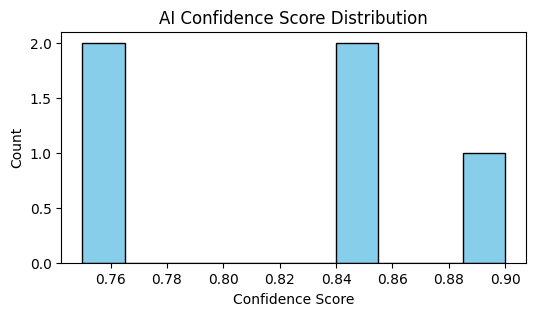


🧑‍⚖️ Human Override Patterns:
   Total Cases: 5
   Human Overrides: 5
   Override Rate: 100.0%
   ⚠️ Review override cases for possible AI improvement.

📝 Reviewer Decision Breakdown:
   y: 5

💡 Use these insights to refine AI models and human-in-the-loop processes.


In [9]:
# TODO: Implement Workflow Analysis and Metrics
# Students: Calculate efficiency metrics and cost analysis

def analyze_workflow_efficiency(processed_cases, approved_sars, rejected_cases, audit_decisions):
    """
    TODO: Calculate workflow efficiency metrics
    
    Metrics to calculate:
    1. Processing efficiency (time per case)
    2. Cost optimization (two-stage vs single-stage)
    3. Human decision patterns
    4. AI accuracy validation
    5. Regulatory compliance rates
    """
    print("📊 Workflow Efficiency Analysis")
    # print("📋 TODO: Calculate processing metrics")
    
    # Example metrics calculation (uncomment and implement):
    total_cases = len(processed_cases)
    approved_cases = len(approved_sars)
    rejected_cases_count = len(rejected_cases)
    
    if total_cases > 0:
        approval_rate = approved_cases / total_cases
        rejection_rate = rejected_cases_count / total_cases
    else:
        approval_rate = rejection_rate = 0
    
    print(f"📈 WORKFLOW METRICS:")
    print(f"   Total Cases Processed: {total_cases}")
    print(f"   SARs Filed: {approved_cases}")
    print(f"   Cases Rejected: {rejected_cases_count}")
    print(f"   Approval Rate: {approval_rate:.1%}")
    print(f"   Rejection Rate: {rejection_rate:.1%}")
    
    # Cost optimization analysis
    print(f"\n💰 COST OPTIMIZATION:")
    print(f"   Two-stage processing saves costs by only running")
    print(f"   expensive compliance generation on approved cases")
    print(f"   Cost savings: {rejection_rate:.1%} of compliance calls avoided")
    
    print("💡 Implement metrics calculation after running workflow")

def validate_ai_decisions(audit_decisions):
    """TODO: Analyze AI decision patterns and accuracy"""
    # print("📋 TODO: Validate AI classification accuracy")
    # print("📋 TODO: Analyze confidence score distributions") 
    # print("📋 TODO: Review human override patterns")

    import matplotlib.pyplot as plt
    import numpy as np
    from collections import Counter

    print("\uD83D\uDCDD AI Decision Validation Report")
    if not audit_decisions:
        print("⚠️ No audit decisions to validate.")
        return

    # Extract relevant fields
    classifications = [d.get('ai_classification', 'Unknown') for d in audit_decisions]
    confidences = [d.get('ai_confidence', 0) for d in audit_decisions]
    reviewer_decisions = [d.get('reviewer_decision', 'n/a') for d in audit_decisions]
    decisions = [d.get('decision', '').lower() for d in audit_decisions]
    overrides = [d['decision'].lower() != d['reviewer_decision'].lower() for d in audit_decisions if 'decision' in d and 'reviewer_decision' in d]

    # 1. Classification distribution
    class_counts = Counter(classifications)
    print(f"\n📊 AI Classification Distribution:")
    for cls, count in class_counts.items():
        print(f"   {cls}: {count}")

    # 2. Confidence score statistics
    if confidences:
        mean_conf = np.mean(confidences)
        min_conf = np.min(confidences)
        max_conf = np.max(confidences)
        std_conf = np.std(confidences)
        print(f"\n📈 Confidence Score Stats:")
        print(f"   Mean: {mean_conf:.2f}")
        print(f"   Min: {min_conf:.2f}")
        print(f"   Max: {max_conf:.2f}")
        print(f"   Std: {std_conf:.2f}")
        # Plot histogram
        plt.figure(figsize=(6,3))
        plt.hist(confidences, bins=10, color='skyblue', edgecolor='black')
        plt.title('AI Confidence Score Distribution')
        plt.xlabel('Confidence Score')
        plt.ylabel('Count')
        plt.show()
    else:
        print("No confidence scores available.")

    # 3. Human override patterns
    print(f"\n🧑‍⚖️ Human Override Patterns:")
    total = len(audit_decisions)
    overrides_count = sum(overrides)
    print(f"   Total Cases: {total}")
    print(f"   Human Overrides: {overrides_count}")
    print(f"   Override Rate: {overrides_count/total:.1%}")
    if overrides_count > 0:
        print("   ⚠️ Review override cases for possible AI improvement.")
    else:
        print("   ✅ No human overrides detected.")

    # 4. Reviewer decision breakdown
    reviewer_counts = Counter([d.lower() for d in reviewer_decisions])
    print(f"\n📝 Reviewer Decision Breakdown:")
    for dec, count in reviewer_counts.items():
        print(f"   {dec}: {count}")

    print("\n💡 Use these insights to refine AI models and human-in-the-loop processes.")

# Run analysis
analyze_workflow_efficiency(processed_cases, approved_sars, rejected_cases, audit_decisions)
validate_ai_decisions(audit_decisions)

## 🏁 Step 6: Complete System Demonstration

Test your complete system with comprehensive scenarios to validate production readiness.

In [10]:
# TODO: Run Complete System Test
# Students: Demonstrate your complete SAR processing system

def demonstrate_complete_system():
    """
    TODO: Run complete system demonstration
    
    This should:
    1. Process multiple customers through the complete workflow
    2. Show both approved and rejected cases
    3. Generate multiple SAR documents
    4. Demonstrate audit trail creation
    5. Show efficiency metrics
    """
    print("🏁 Complete SAR Processing System Demonstration")
    print("📋 TODO: Run complete workflow with multiple customers")
    print("📋 TODO: Show both approval and rejection scenarios")
    print("📋 TODO: Generate audit reports")
    print("📋 TODO: Calculate final efficiency metrics")
    
    # Example demonstration (uncomment after implementation):
    print("🚀 Running complete system test...")
    
    # Load fresh data
    customers_data, accounts_data, transactions_data = load_and_preprocess_data()
    
    # Screen customers
    selected_customers = screen_high_risk_customers(customers_data, accounts_data, transactions_data, top_n=3)
    
    # Run workflow
    processed_cases, approved_sars, rejected_cases, audit_decisions = run_two_stage_sar_workflow(selected_customers)
    
    # Generate final report
    analyze_workflow_efficiency(processed_cases, approved_sars, rejected_cases, audit_decisions)
    
    print(f"🎉 System demonstration complete!")
    print(f"📄 SAR documents saved to: ../outputs/filed_sars/")
    print(f"📊 Audit logs saved to: ../outputs/audit_logs/")

demonstrate_complete_system()

🏁 Complete SAR Processing System Demonstration
📋 TODO: Run complete workflow with multiple customers
📋 TODO: Show both approval and rejection scenarios
📋 TODO: Generate audit reports
📋 TODO: Calculate final efficiency metrics
🚀 Running complete system test...
📊 Loading Financial Data
📈 Loaded: 150 customers, 178 accounts, 4268 transactions
🔍 Customer Risk Screening
🤖 Two-Stage SAR Processing Workflow
📋 TODO: For each selected customer:
   1. Create CaseData from customer, accounts, transactions
   2. Run Risk Analyst analysis
   3. Display analysis results to human reviewer
   4. Get human decision (input('Proceed with SAR filing? (yes/no): '))
   5. If 'yes': Run Compliance Officer narrative generation
   6. Create complete SAR document with all metadata
   7. Save SAR to ../outputs/filed_sars/ directory
   8. Log decision to audit trail

🔍 CUSTOMER 1/3: Jacqueline Rodriguez
🔍 STAGE 1: Risk Analysis
llm_response:  ChatCompletion(id='chatcmpl-DC5jFXiU0ggMibptrFacUGAD9dh7J', choices=[Ch

## 📝 Implementation Checklist

### ✅ Workflow Integration Deliverables
- [ ] **Data Loading**: Load and preprocess CSV data with proper error handling
- [ ] **Customer Screening**: Implement risk-based screening to identify high-risk cases
- [ ] **Two-Stage Workflow**: Build complete Risk Analyst → Human Gate → Compliance Officer flow
- [ ] **Human Decision Gates**: Implement interactive approval/rejection points
- [ ] **SAR Document Generation**: Create complete FinCEN-ready documents with metadata
- [ ] **Audit Trail Creation**: Log all decisions and reasoning for regulatory examination
- [ ] **Efficiency Metrics**: Calculate cost optimization and processing efficiency
- [ ] **System Demonstration**: Test complete workflow with multiple scenarios

### ✅ Testing and Validation Requirements
- [ ] **Component Validation**: Verify all foundation components and agents are available
- [ ] **Integration Testing**: Run comprehensive test suites for all components with proper sys.path setup
- [ ] **End-to-End Testing**: Test complete workflow with automated scenarios
- [ ] **Error Handling Testing**: Validate graceful handling of edge cases and failures
- [ ] **Output Validation**: Ensure SAR documents meet regulatory standards
- [ ] **Performance Testing**: Measure workflow efficiency and processing times

### ✅ Technical Requirements
- [ ] **Error Handling**: Robust exception handling for all workflow steps
- [ ] **Data Validation**: Proper validation of all inputs and outputs
- [ ] **File Management**: Organize outputs in appropriate directories
- [ ] **Logging**: Comprehensive audit logging for compliance
- [ ] **Performance**: Efficient processing of multiple cases
- [ ] **User Experience**: Clear prompts and feedback for human reviewers
- [ ] **Test Infrastructure**: Proper test imports and sys.path configuration

### ✅ Business Requirements  
- [ ] **Regulatory Compliance**: Ensure all SAR documents meet FinCEN requirements
- [ ] **Cost Optimization**: Demonstrate savings from two-stage processing
- [ ] **Audit Readiness**: Create examination-ready documentation
- [ ] **Quality Assurance**: Validate AI decisions with human oversight
- [ ] **Scalability**: Design for processing larger datasets
- [ ] **Production Readiness**: Complete testing validates system reliability

## 🎯 Success Criteria

By completion, your integrated system should:
- ✅ Process real financial data with proper validation
- ✅ Execute complete two-stage AI workflow with human gates
- ✅ Generate regulatory-compliant SAR documents
- ✅ Create comprehensive audit trails for all decisions
- ✅ Demonstrate measurable cost optimization benefits
- ✅ Handle errors gracefully and provide clear user feedback
- ✅ Pass all integration and end-to-end tests
- ✅ Meet production-ready quality standards

## 🚀 Next Steps

1. **Complete Implementation**: Fill in all TODO sections with working code
2. **Run Integration Tests**: Validate all components work together properly
3. **Execute End-to-End Tests**: Test complete workflow with automated scenarios
4. **Test Thoroughly**: Run complete workflow with various manual scenarios
5. **Validate Outputs**: Ensure SAR documents meet regulatory requirements
6. **Document Results**: Create final project documentation and metrics
7. **Prepare Presentation**: Demonstrate your system's capabilities and business value

**Congratulations on building a complete AI-powered SAR processing system! 🎉**

## 🧪 Step 7: Workflow Testing and Validation

Before finalizing your implementation, validate your complete system with comprehensive testing.

In [11]:
# 🧪 Workflow Integration Testing
# Validate your complete system with integration tests

import sys
import os

# Add tests directory to Python path for importing test modules
project_root = os.path.abspath('..')
sys.path.insert(0, os.path.abspath('..'))

tests_path = os.path.join(project_root, 'tests')
#if tests_path not in sys.path:
#    sys.path.insert(0, tests_path)

print(f"📁 Added tests directory to Python path: {tests_path}")

def run_integration_tests():
    """
    Run comprehensive integration tests to validate the complete workflow
    
    Tests include:
    1. Foundation components integration
    2. Agent communication and data flow
    3. End-to-end workflow execution
    4. Error handling and edge cases
    5. Output validation and compliance
    """
    print("🧪 Comprehensive Integration Testing")
    # print("📋 TODO: Uncomment and run after implementing complete workflow")
    
    # Uncomment when your complete system is ready:
    try:
        # Import all test modules
        from tests.test_foundation import TestCustomerData, TestAccountData, TestTransactionData, TestCaseData
        from tests.test_risk_analyst import TestRiskAnalystAgent
        from tests.test_compliance_officer import TestComplianceOfficerAgent
        import pytest
        
        print("🔍 Running Foundation Component Tests...")
        foundation_result = pytest.main([
            f"{tests_path}/test_foundation.py", 
            "-v", 
            "--tb=short"
        ])
        
        print("🔍 Running Risk Analyst Agent Tests...")
        risk_result = pytest.main([
            f"{tests_path}/test_risk_analyst.py", 
            "-v", 
            "--tb=short"
        ])
        
        print("📝 Running Compliance Officer Agent Tests...")
        compliance_result = pytest.main([
            f"{tests_path}/test_compliance_officer.py", 
            "-v", 
            "--tb=short"
        ])
        
        # Calculate overall test results
        all_passed = foundation_result == 0 and risk_result == 0 and compliance_result == 0
        
        print("\n" + "="*60)
        print("📊 INTEGRATION TEST RESULTS:")
        print(f"   Foundation Components: {'✅ PASS' if foundation_result == 0 else '❌ FAIL'}")
        print(f"   Risk Analyst Agent: {'✅ PASS' if risk_result == 0 else '❌ FAIL'}")
        print(f"   Compliance Officer Agent: {'✅ PASS' if compliance_result == 0 else '❌ FAIL'}")
        print(f"   Overall Status: {'✅ ALL TESTS PASSED' if all_passed else '❌ SOME TESTS FAILED'}")
        
        if all_passed:
            print("\n🎉 Your system is ready for production workflow testing!")
            print("📝 Proceed to run the complete system demonstration.")
        else:
            print("\n⚠️ Fix failing tests before running the complete workflow.")
            print("📝 Return to previous notebooks to fix component issues.")
        
        return all_passed
            
    except ImportError as e:
        print(f"❌ Import Error: {e}")
        print("💡 Make sure all components are implemented:")
        print("   • foundation_sar.py")
        print("   • risk_analyst_agent.py") 
        print("   • compliance_officer_agent.py")
        return False

def validate_workflow_components():
    """Validate that all required components are available for integration"""
    print("🔍 Validating Workflow Components")
    
    components_status = {
        'foundation_sar': False,
        'risk_analyst_agent': False,
        'compliance_officer_agent': False,
        'test_modules': False
    }
    
    try:
        # Check foundation components
        from src.foundation_sar import CustomerData, CaseData, ExplainabilityLogger, DataLoader
        components_status['foundation_sar'] = True
        print("✅ Foundation components available")
    except ImportError:
        print("❌ Foundation components not available")
    
    try:
        # Check risk analyst agent
        from src.risk_analyst_agent import RiskAnalystAgent
        components_status['risk_analyst_agent'] = True
        print("✅ Risk Analyst Agent available")
    except ImportError:
        print("❌ Risk Analyst Agent not available")
    
    try:
        # Check compliance officer agent
        from src.compliance_officer_agent import ComplianceOfficerAgent
        components_status['compliance_officer_agent'] = True
        print("✅ Compliance Officer Agent available")
    except ImportError:
        print("❌ Compliance Officer Agent not available")
    
    try:
        # Check test modules
        from tests.test_foundation import TestCustomerData
        from tests.test_risk_analyst import TestRiskAnalystAgent  
        from tests.test_compliance_officer import TestComplianceOfficerAgent
        components_status['test_modules'] = True
        print("✅ Test modules available")
    except ImportError:
        print("❌ Test modules not available")
    
    all_ready = all(components_status.values())
    
    print(f"\n📊 Component Status: {'✅ ALL READY' if all_ready else '⚠️ INCOMPLETE'}")
    if not all_ready:
        print("💡 Complete missing components before running integration tests")
    
    return all_ready

# Run component validation
components_ready = validate_workflow_components()

# Run integration tests if components are ready
if components_ready:
    print("\n🚀 All components ready - you can run integration tests!")
    run_integration_tests()
else:
    print("\n📋 Complete component implementation first, then run integration tests")

📁 Added tests directory to Python path: c:\Users\john_\Documents\MyPlace\ITDevelopement\Python\Projects\udacity_fs_agentic_ai\cd14685-fin-serv-agentic-c1-classroom\project\starter\tests
🔍 Validating Workflow Components
✅ Foundation components available
✅ Risk Analyst Agent available
✅ Compliance Officer Agent available
✅ Test modules available

📊 Component Status: ✅ ALL READY

🚀 All components ready - you can run integration tests!
🧪 Comprehensive Integration Testing
🔍 Running Foundation Component Tests...
============================= test session starts =============================
platform win32 -- Python 3.13.10, pytest-9.0.2, pluggy-1.6.0 -- c:\Users\john_\Documents\MyPlace\ITDevelopement\Python\Environments\venv_udacity_fs_agentic_ai\Scripts\python.exe
cachedir: .pytest_cache
rootdir: c:\Users\john_\Documents\MyPlace\ITDevelopement\Python\Projects\udacity_fs_agentic_ai\cd14685-fin-serv-agentic-c1-classroom\project\starter
plugins: anyio-4.12.1
collecting ... collected 10 items



In [12]:
# 🎯 End-to-End Workflow Testing
# Test the complete workflow with known test scenarios

def test_complete_workflow():
    """
    Test the complete SAR processing workflow end-to-end
    
    This test should:
    1. Load test data (can use a subset of actual data)
    2. Run customer screening
    3. Execute two-stage AI analysis
    4. Simulate human decisions (automated for testing)
    5. Generate SAR documents
    6. Validate all outputs
    7. Check audit trail completeness
    """
    print("🎯 End-to-End Workflow Testing")
    # print("📋 TODO: Implement after completing all workflow components")
    
    # Example end-to-end test structure (uncomment when ready):
    try:
        print("🚀 Starting end-to-end workflow test...")
        
        # Test data preparation
        print("📊 Loading test data...")
        customers_data, accounts_data, transactions_data = load_and_preprocess_data()
        
        if not customers_data:
            print("⚠️ No test data available - implement data loading first")
            return False
        
        # Test customer screening
        print("🔍 Testing customer screening...")
        selected_customers = screen_high_risk_customers(
            customers_data, accounts_data, transactions_data, top_n=2
        )
        
        if not selected_customers:
            print("⚠️ No customers selected - check screening criteria")
            return False
        
        print(f"✅ Selected {len(selected_customers)} customers for testing")
        
        # Test workflow with automated decisions (for testing)
        print("🤖 Testing automated workflow...")
        test_results = {
            'cases_processed': 0,
            'sars_generated': 0,
            'errors': []
        }
        
        for customer_data in selected_customers:
            try:
                # Create case
                loader = DataLoader(explainability_logger)
                case_data = loader.create_case_from_data(
                    customer_data['customer'],
                    customer_data['accounts'],
                    customer_data['transactions']
                )
                
                # Test Risk Analyst
                risk_analysis = risk_agent.analyze_case(case_data)
                assert hasattr(risk_analysis, 'classification'), "Risk analysis missing classification"
                assert hasattr(risk_analysis, 'confidence_score'), "Risk analysis missing confidence"
                
                # Test Compliance Officer (simulate approval)
                compliance_review = compliance_agent.generate_compliance_narrative(case_data, risk_analysis)
                assert hasattr(compliance_review, 'narrative'), "Compliance review missing narrative"
                
                compliance_validation = compliance_agent._validate_narrative_compliance(compliance_review)
                print("Compliance Validation: ", compliance_validation)

                if compliance_validation['completeness_status']:
                    compliance_review.completeness_check = True
                    print("✅ Compliance narrative meets all requirements")
                else:
                    compliance_review.completeness_check = False
                    print("❌ Compliance narrative does NOT meet requirements - SAR will be rejected")
 
                    continue  # Skip SAR generation and move to next case
 
                
                # Test SAR generation
                sar_document = create_sar_document(case_data, risk_analysis, compliance_review)
                assert sar_document, "SAR document generation failed"
                
                test_results['cases_processed'] += 1
                test_results['sars_generated'] += 1
                
                print(f"✅ Successfully processed: {customer_data['customer']['name']}")
                
            except Exception as e:
                test_results['errors'].append(f"Error processing {customer_data['customer']['name']}: {e}")
                print(f"❌ Error processing: {customer_data['customer']['name']}: {e}")
        
        # Test results summary
        print("\n📊 END-TO-END TEST RESULTS:")
        print(f"   Cases Processed: {test_results['cases_processed']}")
        print(f"   SARs Generated: {test_results['sars_generated']}")
        print(f"   Errors: {len(test_results['errors'])}")
        
        if test_results['errors']:
            print("❌ Test Errors:")
            for error in test_results['errors']:
                print(f"     • {error}")
        
        success = len(test_results['errors']) == 0 and test_results['cases_processed'] > 0
        
        if success:
            print("\n🎉 END-TO-END TEST PASSED!")
            print("✅ Your complete workflow is ready for production use!")
        else:
            print("\n⚠️ END-TO-END TEST HAD ISSUES")
            print("📝 Fix the errors above before deploying to production")
        
        return success
        
    except Exception as e:
        print(f"❌ End-to-end test failed: {e}")
        print("💡 Ensure all components are properly implemented")
        return False

# Run end-to-end test
# print("📋 TODO: Run end-to-end test after implementing complete workflow")
print("📋 Run end-to-end test after implementing complete workflow")
test_success = test_complete_workflow()

📋 Run end-to-end test after implementing complete workflow
🎯 End-to-End Workflow Testing
🚀 Starting end-to-end workflow test...
📊 Loading test data...
📊 Loading Financial Data
📈 Loaded: 150 customers, 178 accounts, 4268 transactions
🔍 Testing customer screening...
🔍 Customer Risk Screening
✅ Selected 2 customers for testing
🤖 Testing automated workflow...
llm_response:  ChatCompletion(id='chatcmpl-DC5jutzt4CB1x0xnIA9QUhYaiMOPa', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='{\n    "step_1_data_review": {\n        "key_facts": [\n            "Customer: Jacqueline Rodriguez (CUST_0111)",\n            "High-risk customer with a high annual income",\n            "Total of 3 active accounts with varying balances and types",\n            "Total of 121 transactions from 2025-02-05 to 2025-08-01",\n            "Significant total inflows of $386,834.91 with no outflows",\n            "Transaction amounts range from $11.96 to $76,517.25"\n  